In [39]:
import mne
import matplotlib
import pathlib
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn
import matplotlib.pyplot as plt
import scipy
from scipy.fft import rfft, rfftfreq
from IPython.display import clear_output
import random
import pickle
import csv

In [2]:
def random_sample(arr: np.array, size: int) -> np.array:
    return arr[np.random.choice(len(arr), size=size, replace=False)]
def diff(lst1, lst2):
    return list(set(lst1) - set(lst2))

In [3]:
drive_path = "C:/Users/Eugene Chen/Desktop/UNI/Project/Data/"

In [43]:
seizure_pointers = pd.read_excel(drive_path+'seizure data.xlsx', index_col=0)
seizure_pointers['index'] = seizure_pointers['seizure_file'] +" "+ seizure_pointers['seizure_number'].astype(str)
seizure_pointers=seizure_pointers.set_index('index')
channels = ['P8-O2', 'C4-P4', 'FP1-F3', 'FP2-F8', 'CZ-PZ', 'FP1-F7', 'T7-P7', 'C3-P3', 'FP2-F4', 'P4-O2', 'F8-T8', 'F7-T7', 'F3-C3', 'FZ-CZ', 'P3-O1', 'P7-O1', 'F4-C4']

In [5]:
# constants
EPOCH_DURATION = 2
OVERLAP_DURATION = 1

In [6]:
seizure_pointers.head(10)

,case,seizure_file,number_of_channels,channels,seizure_number,seizure_start,seizure_end,seizure_duration
index,,,,,,,,
chb01_03 1,chb01,chb01_03,22,"['P8-O2', 'C4-P4', 'T8-P8', 'T7-FT9', 'FP1-F3'...",1,2996,3036,40
chb01_04 1,chb01,chb01_04,22,"['P8-O2', 'C4-P4', 'T8-P8', 'T7-FT9', 'FP1-F3'...",1,1467,1494,27
chb01_15 1,chb01,chb01_15,22,"['P8-O2', 'C4-P4', 'T8-P8', 'T7-FT9', 'FP1-F3'...",1,1732,1772,40
chb01_16 1,chb01,chb01_16,22,"['P8-O2', 'C4-P4', 'T8-P8', 'T7-FT9', 'FP1-F3'...",1,1015,1066,51
chb01_18 1,chb01,chb01_18,22,"['P8-O2', 'C4-P4', 'T8-P8', 'T7-FT9', 'FP1-F3'...",1,1720,1810,90
chb01_21 1,chb01,chb01_21,22,"['P8-O2', 'C4-P4', 'T8-P8', 'T7-FT9', 'FP1-F3'...",1,327,420,93
chb01_26 1,chb01,chb01_26,22,"['P8-O2', 'C4-P4', 'T8-P8', 'T7-FT9', 'FP1-F3'...",1,1862,1963,101
chb02_16 1,chb02,chb02_16,22,"['P8-O2', 'C4-P4', 'T8-P8', 'T7-FT9', 'FP1-F3'...",1,130,212,82
chb02_17 1,chb02,chb02_17,22,"['P8-O2', 'C4-P4', 'T8-P8', 'T7-FT9', 'FP1-F3'...",1,2972,3053,81


In [7]:
seizure_pointers[seizure_pointers.case == "chb01"].shape[0]

7

In [8]:
target = "chb16"

In [9]:
patient = seizure_pointers[seizure_pointers["case"] == target]

In [10]:
record = None
for i,sesion in patient.groupby("seizure_file"):
    pass
sesion.head()

,case,seizure_file,number_of_channels,channels,seizure_number,seizure_start,seizure_end,seizure_duration
index,,,,,,,,
chb16_18 1,chb16,chb16_18,23,"['P8-O2', 'C4-P4', 'T8-P8', '-', 'T7-FT9', 'FP...",1,627,635,8
chb16_18 2,chb16,chb16_18,23,"['P8-O2', 'C4-P4', 'T8-P8', '-', 'T7-FT9', 'FP...",2,1909,1916,7


In [11]:
seizure_start = list(sesion.seizure_start.values)
seizure_start

[627, 1909]

In [12]:
seizure_duration = list(sesion.seizure_duration.values)
seizure_duration

[8, 7]

In [27]:
edf_data.filter(h_freq=40, l_freq=1)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.3s finished


<RawEDF | chb16_18.edf, 17 x 921600 (3600.0 s), ~119.6 MB, data loaded>

In [29]:
edf_data = mne.io.read_raw_edf(drive_path+'chb-mit-scalp-eeg-database-1.0.0/'+sesion['case'][0]+'/'+sesion['seizure_file'][0]+'.edf/', preload=True, verbose=40)
if len(diff(channels, edf_data.ch_names))==0:
    edf_data.filter(h_freq=40, l_freq=1, verbose=False)
    edf_data.drop_channels(diff(edf_data.ch_names, channels))
    seizures = mne.Annotations(onset=seizure_start, duration=seizure_duration, description='bad')
    edf_data.set_annotations(seizures)
    raw_seizures = mne.concatenate_raws(edf_data.crop_by_annotations(), verbose=False)
    seizures = mne.make_fixed_length_epochs(raw_seizures,EPOCH_DURATION,overlap=OVERLAP_DURATION,reject_by_annotation=False, verbose=False)
    non_seizures = mne.make_fixed_length_epochs(edf_data,EPOCH_DURATION,reject_by_annotation=True, preload = 'fast', verbose=False)

In [52]:
seizures.get_data().shape

Using data from preloaded Raw for 14 events and 512 original time points ...


(14, 17, 512)

In [53]:
seizure = seizures.get_data()[0][0]

Using data from preloaded Raw for 14 events and 512 original time points ...


In [55]:
ictal_ft = rfft(seizure)
N = len(ictal_ft)
n = np.arange(N)
T = 2
freq = n/T

c:\Users\Eugene Chen\.conda\envs\mne\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


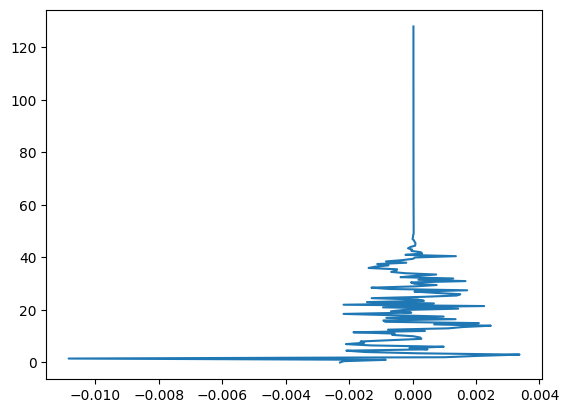

In [56]:
plt.plot(v,ictal_ft)
plt.show()

In [33]:
non_seizures.get_data().shape

(1791, 17, 512)

In [18]:
last_read = ""
seizures_array = np.array([]).reshape(0,17,512)
num = 0
epoch_list = []

for i, row in seizure_pointers.iterrows():
    clear_output(wait=True)
    print(str(num)+"/"+str(seizure_pointers.shape[0]-1))
    print(i)
    num+=1
    
    if last_read != row['seizure_file']:
        file_name = row['seizure_file']+'.edf/'
        folder_name = row['case']+'/'
        edf_data = mne.io.read_raw_edf(drive_path+'chb-mit-scalp-eeg-database-1.0.0/'+folder_name+file_name, verbose=40)
        print('current channels:', edf_data.ch_names)
        print('dropping channels:', diff(edf_data.ch_names, channels))
        print('not contains channels:', diff(channels, edf_data.ch_names))
        if len(diff(channels, edf_data.ch_names))!=0:
            continue
        edf_data.drop_channels(diff(edf_data.ch_names, channels))

    seizures = mne.Annotations(onset=row['seizure_start'], duration=row['seizure_duration'], description='bad')
    edf_data.set_annotations(seizures)

    if last_read != row['seizure_file'] or i == seizure_pointers.shape[0]-1:
        last_read = row['seizure_file']
        raw_seizures = mne.concatenate_raws(edf_data.crop_by_annotations(), verbose=False)
        seizures = mne.make_fixed_length_epochs(raw_seizures,EPOCH_DURATION,reject_by_annotation=False, verbose=False)
        seizures_array = np.concatenate((seizures_array,seizures.get_data()), axis=0)
        non_seizures = mne.make_fixed_length_epochs(edf_data,EPOCH_DURATION,reject_by_annotation=True, preload = 'fast', verbose=False)
        epoch_list.append(non_seizures)

4/197
chb01_18 1
current channels: ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
dropping channels: ['T7-FT9', 'P7-T7', 'T8-P8-1', 'FT10-T8', 'FT9-FT10', 'T8-P8-0']
not contains channels: []
Loading data for 45 events and 512 original time points ...
0 bad epochs dropped


KeyboardInterrupt: 

In [16]:
X = non_seizures.get_data()
Y = seizures.get_data()

Loading data for 14 events and 512 original time points ...


In [17]:
non_seizures_array = np.array([]).reshape(0,17,512)
for i in range(seizures_array.shape[0]):
    sample = random.randint(0,len(epoch_list)-1)
    unit = random.randint(0,len(epoch_list[sample])-1)
    non_seizures_array = np.concatenate((non_seizures_array,epoch_list[sample][unit].get_data()), axis=0)

NameError: name 'seizures_array' is not defined

In [86]:
label_std = [n + '-std' for n in channels]
label_var = [n + '-var' for n in channels]
label_max = [n + '-max' for n in channels]
label_skw = [n + '-skw' for n in channels]
label_krt = [n + '-krt' for n in channels]
label_std_rfft = [n + '-std_rfft' for n in channels]
label_var_rfft = [n + '-var_rfft' for n in channels]
label_max_rfft = [n + '-max_rfft' for n in channels]
label_skw_rfft = [n + '-skw_rfft' for n in channels]
label_krt_rfft = [n + '-krt_rfft' for n in channels]

In [41]:
X = non_seizures_array
Y = seizures_array

In [95]:
std_X = np.std(X, axis=2)
var_X = np.var(X, axis=2)
max_X = np.max(X, axis=2)
skw_X = scipy.stats.skew(X, axis=2)
krt_X = scipy.stats.kurtosis(X, axis=2)
X_rfft = np.real(rfft(X, axis=2))
std_X_rfft = np.std(X_rfft, axis=2)
var_X_rfft = np.var(X_rfft, axis=2)
max_X_rfft = np.max(X_rfft, axis=2)
skw_X_rfft = scipy.stats.skew(X_rfft, axis=2)
krt_X_rfft = scipy.stats.kurtosis(X_rfft, axis=2)
index_X = list(range(len(X)))

std_Y = np.std(Y, axis=2)
var_Y = np.var(Y, axis=2)
max_Y = np.max(Y, axis=2)
skw_Y = scipy.stats.skew(Y, axis=2)
krt_Y = scipy.stats.kurtosis(Y, axis=2)
Y_rfft = np.real(rfft(Y, axis=2))
std_Y_rfft = np.std(Y_rfft, axis=2)
var_Y_rfft = np.var(Y_rfft, axis=2)
max_Y_rfft = np.max(Y_rfft, axis=2)
skw_Y_rfft = scipy.stats.skew(Y_rfft, axis=2)
krt_Y_rfft = scipy.stats.kurtosis(Y_rfft, axis=2)
index_Y = list(range(len(X),len(X)+len(Y)))

df_X = pd.DataFrame(data=std_X, index=index_X, columns=label_std)
df_X = df_X.join(pd.DataFrame(data=var_X, index=index_X, columns=label_var))
df_X = df_X.join(pd.DataFrame(data=max_X, index=index_X, columns=label_max))
df_X = df_X.join(pd.DataFrame(data=skw_X, index=index_X, columns=label_skw))
df_X = df_X.join(pd.DataFrame(data=krt_X, index=index_X, columns=label_krt))
df_X = df_X.join(pd.DataFrame(data=var_X_rfft, index=index_X, columns=label_var_rfft))
df_X = df_X.join(pd.DataFrame(data=max_X_rfft, index=index_X, columns=label_max_rfft))
df_X = df_X.join(pd.DataFrame(data=skw_X_rfft, index=index_X, columns=label_skw_rfft))
df_X = df_X.join(pd.DataFrame(data=krt_X_rfft, index=index_X, columns=label_krt_rfft))


df_Y = pd.DataFrame(data=std_Y, index=index_Y, columns=label_std)
df_Y = df_Y.join(pd.DataFrame(data=var_Y, index=index_Y, columns=label_var))
df_Y = df_Y.join(pd.DataFrame(data=max_Y, index=index_Y, columns=label_max))
df_Y = df_Y.join(pd.DataFrame(data=skw_Y, index=index_Y, columns=label_skw))
df_Y = df_Y.join(pd.DataFrame(data=krt_Y, index=index_Y, columns=label_krt))
df_Y = df_Y.join(pd.DataFrame(data=var_Y_rfft, index=index_Y, columns=label_var_rfft))
df_Y = df_Y.join(pd.DataFrame(data=max_Y_rfft, index=index_Y, columns=label_max_rfft))
df_Y = df_Y.join(pd.DataFrame(data=skw_Y_rfft, index=index_Y, columns=label_skw_rfft))
df_Y = df_Y.join(pd.DataFrame(data=krt_Y_rfft, index=index_Y, columns=label_krt_rfft))

df = pd.concat([df_X, df_Y])
df=(df-df.mean())/df.std()
aux = pd.concat([pd.DataFrame(data=0, index=index_X, columns=['seizure']),pd.DataFrame(data=1, index=index_Y, columns=['seizure'])])
df = df.join(aux)

In [98]:
csv_file =  open('data\\'+target+'.csv', 'w')
df.to_csv(csv_file)
csv_file.close()

In [43]:
# Dump the data into a pickle file
with open(drive_path + '/data.pickle', 'wb') as f:
    pickle.dump(df, f)

In [7]:
# Load the data from a pickle file
with open(drive_path + '/data.pickle', 'rb') as f:
    df = pickle.load(f)

In [44]:
df.shape

(9012, 154)

In [ ]:
# times = []
# durations = []
# for i, row in seizure_pointers.loc[seizure_pointers['seizure_file'] == 'chb12_38'].iterrows():
#     times.append(row['seizure_start'])
#     durations.append(row['seizure_duration'])
# edf_data2 = mne.io.read_raw_edf(drive_path+'chb-mit-scalp-eeg-database-1.0.0/'+'chb12/'+'chb12_38.edf/', verbose=False)
# edf_data2.drop_channels(diff(edf_data2.ch_names, channels))
# seizures2 = mne.Annotations(onset=times, 
#         duration=durations, 
#         description=['bad']*len(durations))
# edf_data2.set_annotations(seizures2)
# raw_seizures2 = mne.concatenate_raws(edf_data2.crop_by_annotations())
# seizures2 = mne.make_fixed_length_epochs(raw_seizures2,2,reject_by_annotation=False)
# edf_data = mne.io.concatenate_raws([edf_data, edf_data2])
# raw_seizures = mne.io.concatenate_raws([raw_seizures, raw_seizures2])
# seizures = mne.make_fixed_length_epochs(raw_seizures,2,reject_by_annotation=False)
# epochs = mne.make_fixed_length_epochs(edf_data,2,reject_by_annotation=True)
# epochs.drop_bad()
# non_seizures = random_sample(epochs,seizures.get_data().shape[0])
# X = non_seizures.get_data()
# Y = seizures.get_data()

# Prediction by ML

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [11]:
df = df.dropna()
X = df.drop(columns = 'seizure')
y = df['seizure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test.values, y_pred, pos_label="True")

0.8688711516533638

In [17]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test.values, y_pred, pos_label="True")

0.809384164222874

In [42]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test.values, y_pred, pos_label="True")

0.7882005899705014

# Prediction by DL

In [2]:
! pip install torch

  Using cached torch-1.12.1-cp39-cp39-win_amd64.whl (161.8 MB)


In [27]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
from torch.nn import Linear, GRU, Conv2d, Dropout, MaxPool2d, BatchNorm1d
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax

c:\Users\Eugene Chen\.conda\envs\mne\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
use_cuda = torch.cuda.is_available()
print("Running GPU.") if use_cuda else print("No GPU available.")


def get_variable(x):
    """ Converts tensors to cuda, if available. """
    if use_cuda:
        return x.cuda()
    return x


def get_numpy(x):
    """ Get numpy array for both cuda and not. """
    if use_cuda:
        return x.cpu().data.numpy()
    return x.data.numpy()

No GPU available.


In [30]:
X.shape[1]

153

In [52]:
# Keep track of features to output layer
features_cat_size = X.shape[1] # <-- Number of features concatenated before output layer
    
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.l1 = Linear(in_features=features_cat_size,
                            out_features=50)
        torch.nn.init.xavier_normal_(self.l1.weight)
        self.l2 = Linear(in_features=50,
                            out_features=10)
        torch.nn.init.xavier_normal_(self.l2.weight)
        self.l3 = Linear(in_features=10,
                            out_features=2)
        torch.nn.init.xavier_normal_(self.l3.weight)
        
    def forward(self, features):
        features = [features]
        out = {}
        features_final = torch.cat(features, dim=1)
        features_final = self.l1(features_final)
        features_final = relu(features_final)
        features_final = self.l2(features_final)
        features_final = relu(features_final)
        features_final = self.l3(features_final)
        out['out'] = softmax(features_final)
        return out

net = Net()
if use_cuda:
    net.cuda()
print(net)

Net(
  (l1): Linear(in_features=153, out_features=50, bias=True)
  (l2): Linear(in_features=50, out_features=10, bias=True)
  (l3): Linear(in_features=10, out_features=2, bias=True)
)


In [44]:
LEARNING_RATE = 0.005
criterion = nn.CrossEntropyLoss()          # <-- Your code here.   

# weight_decay is equal to L3 regularization
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

def accuracy(ys, ts):
    predictions = torch.max(ys, 1)[1]
    correct_prediction = torch.eq(predictions, ts)
    return torch.mean(correct_prediction.float())

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
features = torch.from_numpy(X_train.to_numpy()) 

In [51]:
get_variable(Variable(torch.from_numpy(X_train.to_numpy()) ))

tensor([[-0.0476, -0.5151, -0.6518,  ..., -0.0973, -0.2091, -0.3848],
        [ 1.0740,  2.0778,  2.5231,  ..., -0.3451, -0.2285,  0.2275],
        [ 0.2176,  0.0181,  0.6474,  ..., -0.5667,  0.1511, -0.5056],
        ...,
        [-0.0759,  0.2313,  0.4478,  ..., -1.2413,  1.6222,  1.5276],
        [-0.6817, -0.7538, -0.7798,  ...,  0.3089, -0.3024, -0.7600],
        [ 0.5669, -0.0619, -0.1159,  ..., -0.0606,  0.3788,  2.2972]],
       dtype=torch.float64)

In [53]:
# dummy data
_x_features = get_variable(Variable(torch.from_numpy(X_train.to_numpy())))

# test the forward pass
output = net(_x_features)
output['out']

RuntimeError: expected scalar type Float but found Double